- Some utils for puzzle solver 

In [ ]:
# slitherlink split and cut pictures

from PIL import Image

def split_image(image_path, grid_size, save_path):
    # 加载图片
    img = Image.open(image_path)
    img_width, img_height = img.size
    # 确定每个网格的尺寸
    cell_width = img_width // grid_size
    cell_height = img_height // grid_size
    # 切割图片并保存每个网格
    for i in range(grid_size):
        for j in range(grid_size):
            left = j * cell_width
            upper = i * cell_height
            right = left + cell_width
            lower = upper + cell_height
            print((left, upper ,right, lower))
            # 根据计算的坐标切割图片
            cell_image = img.crop((left, upper, right, lower))
            # 构造每个切割图片的保存路径
            cell_image_path = f"{save_path}/cell_{i}_{j}.png"
            # 保存图片
            cell_image.save(cell_image_path)
            print(f"Saved {cell_image_path}")

# 调用函数，确保传入正确的图片路径、网格尺寸和保存路径
split_image("/Users/apple/Desktop/60x60.jpeg", 60, "./Slitherlink_data")


In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
from matplotlib.pyplot import MultipleLocator


#b22a09


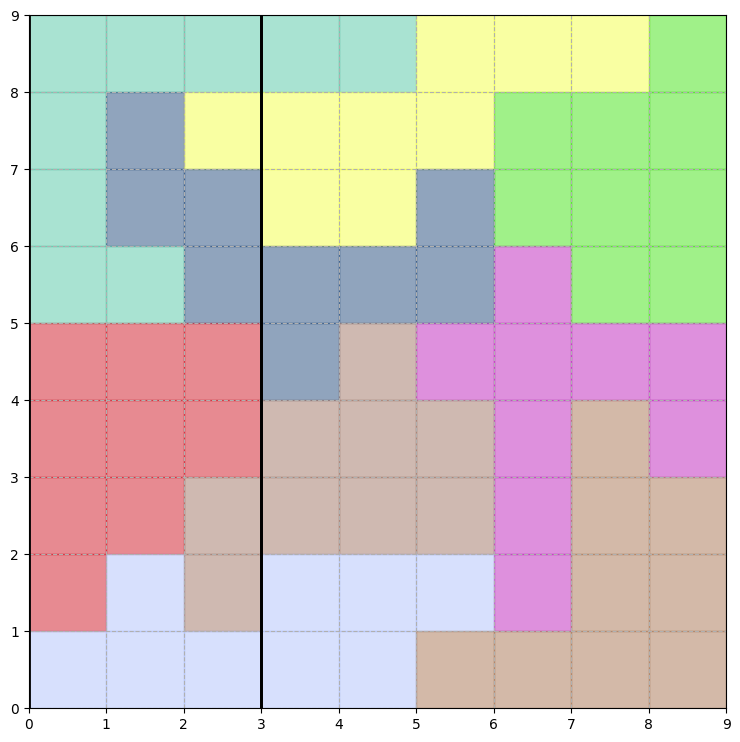

In [18]:
# color generator:
import random

def generate_random_color():
    
    # 生成三个随机的十六进制数字，每个数字的范围是0-255
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    
    # 将RGB值转换为十六进制字符串
    hex_color = f'#{r:02x}{g:02x}{b:02x}'
    return hex_color

# 使用函数生成随机颜色代码
random_color_code = generate_random_color()
print(random_color_code)

def gen_cell_color(grid):
    grid_color = dict()
    unique_cell = list(set(grid))
    for cell in unique_cell:
        grid_color[cell] = generate_random_color()
    return grid_color

def visual(X, Y, grid, grid_cell, cell_color, result):
    plt.figure(figsize = (Y, X))
    ax = plt.gca()
    x_major_locator = MultipleLocator(1)
    y_major_locator = MultipleLocator(1)
    ax.xaxis.set_major_locator(x_major_locator)
    ax.yaxis.set_major_locator(y_major_locator)
    
    ax.plot([3,3], [0, 9], color='black', linewidth=2)  # 横宫边界
    ax.plot([3, 3], [0, 9], color='black', linewidth=2)  # 横宫边界
    ax.plot([0, 0], [0, 9], color='black', linewidth=2)  # 横宫边界
    plt.xlim(0,Y)
    plt.ylim(0,X)
    plt.grid(linestyle = "--")
    for i in range(X):
        for j in range(Y):
            # if grid[i * Y + j] == "X":
            ax.add_patch(Rectangle((j, X - i - 1), 1, 1, color = cell_color[grid_cell[i * Y + j]], alpha = 0.5))
    # for i in range(X + 1):
    #     for j in range(Y + 1):
    #         if grid[i][j] != '.':
    #             ax.add_patch(Circle((j, X - i), 0.3,facecolor = "#ffffff" , edgecolor = "#02040A", linestyle = "-"))
    #             ax.text(j , X - i, grid[i][j], 
    #                         horizontalalignment = "center", 
    #                         verticalalignment = 'center',
    #                         fontsize = 15, color = "#000011")
    plt.show()
        

if __name__ == "__main__":
    grid_cell = "AAAAABBBCADBBBBCCCADDBBDCCCAADDDDECCFFFDGEEEEFFFGGGEHEFFGGGGEHHFIGIIIEHHIIIIIHHHH"
    grid_color = gen_cell_color(grid_cell)
    visual(9, 9, "0" * 81, grid_cell, grid_color, "")

In [9]:
import random
import time

def generate_random_color():
    
    # 生成三个随机的十六进制数字，每个数字的范围是0-255
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    
    # 将RGB值转换为十六进制字符串
    hex_color = f'#{r:02x}{g:02x}{b:02x}'
    return hex_color

# 使用函数生成随机颜色代码
random_color_code = generate_random_color()
print(random_color_code)

def gen_cell_color(grid):
    grid_color = dict()
    unique_cell = list(set(grid))
    for cell in unique_cell:
        grid_color[cell] = generate_random_color()
    return grid_color

if __name__ == "__main__":
    random.seed(1234)
    grid_color = gen_cell_color("AAAAABBBCADBBBBCCCADDBBDCCCAADDDDECCFFFDGEEEEFFFGGGEHEFFGGGGEHHFIGIIIEHHIIIIIHHHH")
    for k, v in grid_color.items():
        print(k, v)

#8a209a
H #e13b03
B #2e112a
D #32b579
A #080f08
C #b1f7ed
E #4c2e5d
F #3a07f9
G #7f21ee
I #232d17


In [8]:
def add_leading_zeros(number):
    # 将数字转换为字符串并补全前导0，宽度为3
    return str(number).zfill(3)

# 示例
print(add_leading_zeros(49))  # 输出 '049'
print(add_leading_zeros(321))  # 输出 '321'


049
321


# Gappy Crawler


In [12]:
import requests 
import re
import time
problems = [27, 28, 29, 30, 18, 19, 20, 25, 26, 39, 40, 49, 50, 59, 60, 69, 70, 78, 79, 80, 87, 88, 89, 90, 97, 98, 99, 100, 109, 110, 119, 120, 126, 127, 128, 129, 130, 136, 137, 138, 139, 140, 170, 180, 190, 278, 279, 280, 288, 289, 290, 298, 299, 300, 308, 309, 310, 318, 319, 320]

for p in problems:
    new_p = add_leading_zeros(p)
    target_url = f"https://www.janko.at/Raetsel/Gappy/{new_p}.a.htm"

    headers = {
        'User-Agent': "User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.5 Safari/605.1.15",
        'Accept': "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
        'Accept-Encoding': "gzip, deflate, br",
        'Accept-Language': "en-US,en;q=0.9",
        'Connection': "keep-alive",
        'Cookie': "index=2; rules=2; genre=2; https__www_janko_at_Raetsel_Slitherlink_0312_a_htm_0=aFxkQXTcYdfwiUew",
        'Host': "www.janko.at",
        'Referer': "https://www.janko.at/Raetsel/index.htm",
        'Sec-Fetch-Dest': "document",
        'Sec-Fetch-Mode': "navigate",
        'Sec-Fetch-Site': "same-origin"
    }

    response = requests.get(target_url, headers=headers)     
    response.encoding = 'utf-8'
    page_source = response.text
    # print(page_source)

    problem_pattern1 = r"(?<=\[clabels\]\n)(.*?)(?=\[rlabels\])"
    problem_pattern2 = r"(?<=\[rlabels\]\n)(.*?)(?=\[solution\])"
    # 正则表达式提取 [solution] 和 [moves] 之间的内容
    solution_pattern = r"(?<=\[solution\]\n)(.*?)(?=\[moves\])"
    solution_pattern2 = r"(?<=\[solution\]\n)(.*?)(?=\[end\])"

    # 使用 re.DOTALL 使 '.' 匹配换行符
    problem_text1 = re.search(problem_pattern1, page_source, re.DOTALL).group().strip()
    problem_text2 = re.search(problem_pattern2, page_source, re.DOTALL).group().strip()
    problem_text = problem_text1 + "\n" + problem_text2
    
    try:
        solution_text = re.search(solution_pattern, page_source, re.DOTALL).group().strip()
    except Exception :
        try:
            solution_text = re.search(solution_pattern2, page_source, re.DOTALL).group().strip()
        except Exception:
            solution_text = ""


    rows = problem_text.split("\n")
    num_rows = len(problem_text2.split())
    num_cols = len(problem_text1.split())
    
    print(f"SIZE: r = {num_rows}, c = {num_cols}")

    with open(f"../assets/data/Gappy/problems/{p}_{num_rows}x{num_cols}.txt", "w") as file:
        # 写入行数和列数到第一行
        file.write(f"{num_rows} {num_cols}\n")
        
        # 写入 problem_text 的每一行
        file.write(problem_text)
    
    with open(f"../assets/data/Gappy/solutions/{p}_{num_rows}x{num_cols}.txt", "w") as file:
        # 写入行数和列数到第一行
        file.write(f"{num_rows} {num_cols}\n")
        
        # 写入 problem_text 的每一行
        file.write(solution_text)
    
    print(f"FILE: problems/{p}_{num_rows}x{num_cols}.txt and FILE solutions/{p}_{num_rows}x{num_cols}.txt, done!")
    time.sleep(2.5)

SIZE: r = 13, c = 13
FILE: problems/27_13x13.txt and FILE solutions/27_13x13.txt, done!
SIZE: r = 14, c = 14
FILE: problems/28_14x14.txt and FILE solutions/28_14x14.txt, done!
SIZE: r = 15, c = 15
FILE: problems/29_15x15.txt and FILE solutions/29_15x15.txt, done!
SIZE: r = 16, c = 16
FILE: problems/30_16x16.txt and FILE solutions/30_16x16.txt, done!
SIZE: r = 12, c = 12
FILE: problems/18_12x12.txt and FILE solutions/18_12x12.txt, done!
SIZE: r = 12, c = 12
FILE: problems/19_12x12.txt and FILE solutions/19_12x12.txt, done!
SIZE: r = 12, c = 12
FILE: problems/20_12x12.txt and FILE solutions/20_12x12.txt, done!
SIZE: r = 12, c = 12
FILE: problems/25_12x12.txt and FILE solutions/25_12x12.txt, done!
SIZE: r = 12, c = 12
FILE: problems/26_12x12.txt and FILE solutions/26_12x12.txt, done!
SIZE: r = 12, c = 12
FILE: problems/39_12x12.txt and FILE solutions/39_12x12.txt, done!
SIZE: r = 12, c = 12
FILE: problems/40_12x12.txt and FILE solutions/40_12x12.txt, done!
SIZE: r = 12, c = 12
FILE: probl

# Slitherlink Crawler



In [11]:
import requests 
import re
import time

problems = [121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 246, 247, 248, 249, 250, 466, 467, 468, 516, 517, 523, 524, 525, 526, 565, 566, 567, 572, 575, 576, 593, 594, 595, 613, 614, 615, 682, 686, 691, 696, 706, 715, 716, 786, 789, 813, 814, 825, 826, 827, 835, 836, 837, 844, 845, 846, 854, 855, 856, 934, 935, 936, 937, 938, 965, 966, 967, 968, 976, 977, 978, 981, 982, 983, 984, 985, 986, 987, 991, 992, 993, 994, 995, 996, 997, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130]

for p in problems[16:100]:
    target_url = f"https://www.janko.at/Raetsel/Slitherlink/{p}.a.htm"

    headers = {
        'User-Agent': "User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.5 Safari/605.1.15",
        'Accept': "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
        'Accept-Encoding': "gzip, deflate, br",
        'Accept-Language': "en-US,en;q=0.9",
        'Connection': "keep-alive",
        'Cookie': "index=2; rules=2; genre=2; https__www_janko_at_Raetsel_Slitherlink_0312_a_htm_0=aFxkQXTcYdfwiUew",
        'Host': "www.janko.at",
        'Referer': "https://www.janko.at/Raetsel/Slitherlink/index.htm",
        'Sec-Fetch-Dest': "document",
        'Sec-Fetch-Mode': "navigate",
        'Sec-Fetch-Site': "same-origin"
    }

    response = requests.get(target_url, headers=headers)     
    response.encoding = 'utf-8'
    page_source = response.text
    # print(page_source)

    problem_pattern = r"(?<=\[problem\]\n)(.*?)(?=\[solution\])"
    # 正则表达式提取 [solution] 和 [moves] 之间的内容
    solution_pattern = r"(?<=\[solution\]\n)(.*?)(?=\[moves\])"
    solution_pattern2 = r"(?<=\[solution\]\n)(.*?)(?=\[end\])"

    # 使用 re.DOTALL 使 '.' 匹配换行符
    problem_text = re.search(problem_pattern, page_source, re.DOTALL).group().strip()
    try:
        solution_text = re.search(solution_pattern, page_source, re.DOTALL).group().strip()
    except Exception :
        try:
            solution_text = re.search(solution_pattern2, page_source, re.DOTALL).group().strip()
        except Exception:
            solution_text = ""


    rows = problem_text.split("\n")

    # 解析每行的列（通过空格分割每行）
    matrix = [row.split() for row in rows]

    # 行数
    num_rows = len(matrix)

    # 列数 (假设每行列数一致)
    num_cols = len(matrix[0]) if num_rows > 0 else 0
    print(f"SIZE: r = {num_rows}, c = {num_cols}")

    with open(f"../assets/data/slitherlinkdata/problems/{p}_{num_rows}x{num_cols}.txt", "w") as file:
        # 写入行数和列数到第一行
        file.write(f"{num_rows} {num_cols}\n")
        
        # 写入 problem_text 的每一行
        file.write(problem_text)
    
    with open(f"../assets/data/slitherlinkdata/solutions/{p}_{num_rows}x{num_cols}.txt", "w") as file:
        # 写入行数和列数到第一行
        file.write(f"{num_rows} {num_cols}\n")
        
        # 写入 problem_text 的每一行
        file.write(solution_text)
    
    print(f"FILE: problems/{p}_{num_rows}x{num_cols}.txt and FILE solutions/{p}_{num_rows}x{num_cols}.txt, done!")
    time.sleep(3)

SIZE: r = 10, c = 18
FILE: problems/137_10x18.txt and FILE solutions/137_10x18.txt, done!
SIZE: r = 10, c = 18
FILE: problems/138_10x18.txt and FILE solutions/138_10x18.txt, done!
SIZE: r = 10, c = 18
FILE: problems/139_10x18.txt and FILE solutions/139_10x18.txt, done!
SIZE: r = 10, c = 18
FILE: problems/140_10x18.txt and FILE solutions/140_10x18.txt, done!
SIZE: r = 10, c = 18
FILE: problems/141_10x18.txt and FILE solutions/141_10x18.txt, done!
SIZE: r = 10, c = 18
FILE: problems/142_10x18.txt and FILE solutions/142_10x18.txt, done!
SIZE: r = 10, c = 18
FILE: problems/143_10x18.txt and FILE solutions/143_10x18.txt, done!
SIZE: r = 10, c = 18
FILE: problems/144_10x18.txt and FILE solutions/144_10x18.txt, done!
SIZE: r = 10, c = 18
FILE: problems/145_10x18.txt and FILE solutions/145_10x18.txt, done!
SIZE: r = 10, c = 18
FILE: problems/146_10x18.txt and FILE solutions/146_10x18.txt, done!
SIZE: r = 10, c = 18
FILE: problems/147_10x18.txt and FILE solutions/147_10x18.txt, done!
SIZE: r = 

# Hitori Crawler 

In [7]:
import requests 
import re
import time

# problems = [37, 38, 39, 40, 58, 59, 60, 77, 78, 82, 85, 86, 87, 88, 89, 90, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 176, 177, 178, 179, 180, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 316, 317, 318, 319, 320, 347, 348, 349, 350, 357, 358, 359, 360, 420, 430, 440, 559, 560, 567, 568, 577, 578, 587, 588, 599, 600, 609, 610, 618, 619, 620, 639, 640, 647, 648, 649, 650, 659, 660, 669, 670, 679, 680, 689, 690, 698, 699, 700, 709, 710, 719, 720, 729, 730, 739, 740, 749, 750, 759, 760, 769, 770, 779, 780, 789, 790, 799, 800, 809, 810, 819, 820, 829, 830, 839, 840, 849, 850, 859, 860, 869, 870, 879, 880, 889, 890, 899, 900, 909, 910]
problems = [179, 180, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 316, 317, 318, 319, 320, 347, 348, 349, 350, 357, 358, 359, 360, 420, 430, 440, 559, 560, 567, 568, 577, 578, 587, 588, 599, 600, 609, 610, 618, 619, 620, 639, 640, 647, 648, 649, 650, 659, 660, 669, 670, 679, 680, 689, 690, 698, 699, 700, 709, 710, 719, 720, 729, 730, 739, 740, 749, 750, 759, 760, 769, 770, 779, 780, 789, 790, 799, 800, 809, 810, 819, 820, 829, 830, 839, 840, 849, 850, 859, 860, 869, 870, 879, 880, 889, 890, 899, 900, 909, 910]
# problems = [211, 212, 213, 214, 215, 216, 218, 220, 221, 244, 245, 246, 254, 255, 256, 264, 265, 266, 267, 274, 275, 276, 277, 284, 285, 286, 287, 294, 295, 296, 297, 304, 305, 306, 325, 326, 327, 335, 336, 337, 365, 366, 367, 375, 376, 377, 383, 384, 385, 386, 393, 394, 395, 396, 403, 404, 405, 406, 413, 414, 423, 424, 433, 434, 443, 444, 445, 446, 453, 454, 455, 456, 463, 464, 465, 466, 471, 472, 473, 481, 482, 483, 493, 494, 503, 504, 505, 506, 513, 514, 515, 516, 523, 524, 525, 526, 533, 534, 535, 536, 553, 554, 561, 562, 571, 572, 581, 582, 611, 612, 613, 631, 632, 633, 634, 641, 642, 643, 644, 653, 654, 663, 664, 671, 672, 681, 682, 691, 692, 693, 703, 704, 713, 714, 723, 724, 733, 734, 743, 744, 753, 754, 763, 764, 773, 774, 783, 784, 793, 794, 803, 804, 813, 814, 823, 824, 833, 834, 843, 844, 853, 854, 863, 864, 873, 874, 883, 884, 893, 894, 903, 904]
# TODO: _not_scraped
for p in problems:
    new_p = add_leading_zeros(p)
    target_url = f"https://www.janko.at/Raetsel/Hitori/{new_p}.a.htm"

    headers = {
        'User-Agent': "User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.5 Safari/605.1.15",
        'Accept': "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
        'Accept-Encoding': "gzip, deflate, br",
        'Accept-Language': "en-US,en;q=0.9",
        'Connection': "keep-alive",
        'Cookie': "index=2; rules=2; genre=2; https__www_janko_at_Raetsel_Slitherlink_0312_a_htm_0=aFxkQXTcYdfwiUew",
        'Host': "www.janko.at",
        'Referer': "https://www.janko.at/Raetsel/index.htm",
        'Sec-Fetch-Dest': "document",
        'Sec-Fetch-Mode': "navigate",
        'Sec-Fetch-Site': "same-origin"
    }

    response = requests.get(target_url, headers=headers)     
    response.encoding = 'utf-8'
    page_source = response.text
    # print(page_source)

    problem_pattern = r"(?<=\[problem\]\n)(.*?)(?=\[solution\])"
    # 正则表达式提取 [solution] 和 [moves] 之间的内容
    solution_pattern = r"(?<=\[solution\]\n)(.*?)(?=\[moves\])"
    solution_pattern2 = r"(?<=\[solution\]\n)(.*?)(?=\[end\])"

    # 使用 re.DOTALL 使 '.' 匹配换行符
    problem_text = re.search(problem_pattern, page_source, re.DOTALL).group().strip()
    try:
        solution_text = re.search(solution_pattern, page_source, re.DOTALL).group().strip()
    except Exception :
        try:
            solution_text = re.search(solution_pattern2, page_source, re.DOTALL).group().strip()
        except Exception:
            solution_text = ""


    rows = problem_text.split("\n")

    # 解析每行的列（通过空格分割每行）
    matrix = [row.split() for row in rows]

    # 行数
    num_rows = len(matrix)

    # 列数 (假设每行列数一致)
    num_cols = len(matrix[0]) if num_rows > 0 else 0
    print(f"SIZE: r = {num_rows}, c = {num_cols}")

    with open(f"../assets/data/hitori/problems/{p}_{num_rows}x{num_cols}.txt", "w") as file:
        # 写入行数和列数到第一行
        file.write(f"{num_rows} {num_cols}\n")
        
        # 写入 problem_text 的每一行
        file.write(problem_text)
    
    with open(f"../assets/data/hitori/solutions/{p}_{num_rows}x{num_cols}.txt", "w") as file:
        # 写入行数和列数到第一行
        file.write(f"{num_rows} {num_cols}\n")
        
        # 写入 problem_text 的每一行
        file.write(solution_text)
    
    print(f"FILE: problems/{p}_{num_rows}x{num_cols}.txt and FILE solutions/{p}_{num_rows}x{num_cols}.txt, done!")
    time.sleep(2.5)

SIZE: r = 17, c = 17
FILE: problems/179_17x17.txt and FILE solutions/179_17x17.txt, done!
SIZE: r = 17, c = 17
FILE: problems/180_17x17.txt and FILE solutions/180_17x17.txt, done!
SIZE: r = 17, c = 17
FILE: problems/199_17x17.txt and FILE solutions/199_17x17.txt, done!
SIZE: r = 17, c = 17
FILE: problems/200_17x17.txt and FILE solutions/200_17x17.txt, done!
SIZE: r = 17, c = 17
FILE: problems/201_17x17.txt and FILE solutions/201_17x17.txt, done!
SIZE: r = 17, c = 17
FILE: problems/202_17x17.txt and FILE solutions/202_17x17.txt, done!
SIZE: r = 17, c = 17
FILE: problems/203_17x17.txt and FILE solutions/203_17x17.txt, done!
SIZE: r = 17, c = 17
FILE: problems/204_17x17.txt and FILE solutions/204_17x17.txt, done!
SIZE: r = 17, c = 17
FILE: problems/205_17x17.txt and FILE solutions/205_17x17.txt, done!
SIZE: r = 17, c = 17
FILE: problems/206_17x17.txt and FILE solutions/206_17x17.txt, done!
SIZE: r = 17, c = 17
FILE: problems/207_17x17.txt and FILE solutions/207_17x17.txt, done!
SIZE: r = 


-------

# Mosaic Crawler 

In [5]:
import requests 
import re
import time

# problems = [6, 7, 8, 9, 10, 11, 17, 20, 24, 26, 31, 32, 83, 84, 91, 92, 101, 102, 111, 112, 113, 121, 122, 123, 131, 132, 133, 141, 142, 143, 144, 145, 161, 162, 163, 164, 171, 172, 173, 174]
# problems = [14, 23, 27,58, 59, 60, 61, 62, 68, 69, 70,43, 44, 45, 53, 54, 55, 56, 57, 38, 39, 40, 41, 42, 51, 52]
problems = [18, 21, 22, 29, 63, 64, 65, 66, 67, 87, 88, 96, 97, 98, 106, 107, 108, 117, 118, 120, 127, 128, 129, 137, 138, 139, 140, 151, 152, 153, 154, 155, 170, 176, 177, 178, 179, 180]
for p in problems:
    new_p = add_leading_zeros(p)
    target_url = f"https://www.janko.at/Raetsel/Mosaik/{new_p}.a.htm"

    headers = {
        'User-Agent': "User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.5 Safari/605.1.15",
        'Accept': "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
        'Accept-Encoding': "gzip, deflate, br",
        'Accept-Language': "en-US,en;q=0.9",
        'Connection': "keep-alive",
        'Cookie': "index=2; rules=2; genre=2; https__www_janko_at_Raetsel_Slitherlink_0312_a_htm_0=aFxkQXTcYdfwiUew",
        'Host': "www.janko.at",
        'Referer': "https://www.janko.at/Raetsel/Slitherlink/index.htm",
        'Sec-Fetch-Dest': "document",
        'Sec-Fetch-Mode': "navigate",
        'Sec-Fetch-Site': "same-origin"
    }

    response = requests.get(target_url, headers=headers)     
    response.encoding = 'utf-8'
    page_source = response.text
    # print(page_source)

    problem_pattern = r"(?<=\[problem\]\n)(.*?)(?=\[solution\])"
    # 正则表达式提取 [solution] 和 [moves] 之间的内容
    solution_pattern = r"(?<=\[solution\]\n)(.*?)(?=\[moves\])"
    solution_pattern2 = r"(?<=\[solution\]\n)(.*?)(?=\[end\])"

    # 使用 re.DOTALL 使 '.' 匹配换行符
    problem_text = re.search(problem_pattern, page_source, re.DOTALL).group().strip()
    try:
        solution_text = re.search(solution_pattern, page_source, re.DOTALL).group().strip()
    except Exception :
        try:
            solution_text = re.search(solution_pattern2, page_source, re.DOTALL).group().strip()
        except Exception:
            solution_text = ""


    rows = problem_text.split("\n")

    # 解析每行的列（通过空格分割每行）
    matrix = [row.split() for row in rows]

    # 行数
    num_rows = len(matrix)

    # 列数 (假设每行列数一致)
    num_cols = len(matrix[0]) if num_rows > 0 else 0
    print(f"SIZE: r = {num_rows}, c = {num_cols}")

    with open(f"../assets/data/Mosaic/problems/{p}_{num_rows}x{num_cols}.txt", "w") as file:
        # 写入行数和列数到第一行
        file.write(f"{num_rows} {num_cols}\n")
        
        # 写入 problem_text 的每一行
        file.write(problem_text)
    
    with open(f"../assets/data/Mosaic/solutions/{p}_{num_rows}x{num_cols}.txt", "w") as file:
        # 写入行数和列数到第一行
        file.write(f"{num_rows} {num_cols}\n")
        
        # 写入 problem_text 的每一行
        file.write(solution_text)
    
    print(f"FILE: problems/{p}_{num_rows}x{num_cols}.txt and FILE solutions/{p}_{num_rows}x{num_cols}.txt, done!")
    time.sleep(3)

SIZE: r = 25, c = 25
FILE: problems/18_25x25.txt and FILE solutions/18_25x25.txt, done!
SIZE: r = 25, c = 25
FILE: problems/21_25x25.txt and FILE solutions/21_25x25.txt, done!
SIZE: r = 25, c = 25
FILE: problems/22_25x25.txt and FILE solutions/22_25x25.txt, done!
SIZE: r = 25, c = 25
FILE: problems/29_25x25.txt and FILE solutions/29_25x25.txt, done!
SIZE: r = 25, c = 25
FILE: problems/63_25x25.txt and FILE solutions/63_25x25.txt, done!
SIZE: r = 25, c = 25
FILE: problems/64_25x25.txt and FILE solutions/64_25x25.txt, done!
SIZE: r = 25, c = 25
FILE: problems/65_25x25.txt and FILE solutions/65_25x25.txt, done!
SIZE: r = 25, c = 25
FILE: problems/66_25x25.txt and FILE solutions/66_25x25.txt, done!
SIZE: r = 25, c = 25
FILE: problems/67_25x25.txt and FILE solutions/67_25x25.txt, done!
SIZE: r = 25, c = 25
FILE: problems/87_25x25.txt and FILE solutions/87_25x25.txt, done!
SIZE: r = 25, c = 25
FILE: problems/88_25x25.txt and FILE solutions/88_25x25.txt, done!
SIZE: r = 25, c = 25
FILE: probl

In [4]:
# with open("problem_text.txt", "w") as file:
#     file.write(problem_text)

rows = problem_text.split("\n")

# 解析每行的列（通过空格分割每行）
matrix = [row.split() for row in rows]

# 行数
num_rows = len(matrix)

# 列数 (假设每行列数一致)
num_cols = len(matrix[0]) if num_rows > 0 else 0

# 输出行数和列数
# print(f"Number of rows: {num_rows}")
# print(f"Number of columns: {num_cols}")

with open("matrix_output.txt", "w") as file:
    # 写入行数和列数到第一行
    file.write(f"{num_rows} {num_cols}\n")
    
    # 写入 problem_text 的每一行
    file.write(problem_text)

In [14]:
res = response.text
import re 

pattern = r'(?<=\[problem\]\n)(.*?)(?=\[solution\])'

grid = re.findall(pattern, res)

print(grid)


[]


In [15]:
import re

# 输入的长文本
text = """
info 090
unit 30
rows 10
cols 18
[problem]
2 - - 1 1 - - 1 2 - - - - 1 3 - 2 - 
1 - 2 - - - 1 - - - 1 - 1 - - - 1 - 
- - 3 - - 2 - 1 3 1 - 2 - - 2 - - 2 
2 - - - 1 - 2 - - - 3 - 3 - 3 - - 1 
1 - 3 - 1 - 1 - - - - 2 - - - 2 - - 
- - 3 - - - 1 - - - - 3 - 1 - 1 - 2 
2 - - 3 - 1 - 2 - - - 1 - 3 - - - 1 
2 - - 1 - - 2 - 3 2 2 - 2 - - 2 - - 
- 3 - - - 2 - 2 - - - 2 - - - 2 - 0 
- 3 - 0 2 - - - - 2 1 - - 1 3 - - 1 
[solution]
x x - - - - x x x x x x x x x - x x
x x x x x x x x - - - - x x - - x x
x x - x - x - x x - - x x x x x x -
- x - - - x - x - - x x - x - x - -
- x x - - x - - - - - - - - - x - x
- x - - - - - - - - - x - - x x x x
- x x x - - x x - - x x x - x - - -
x x - - - - - x x - x - x x x x - -
x - - - x x - x - - x - - - - x - -
x x - - - x x x x x x x - - x x x -
[moves]
"""

# 正则表达式提取 [problem] 和 [solution] 之间的内容
problem_pattern = r"(?<=\[problem\]\n)(.*?)(?=\[solution\])"
# 正则表达式提取 [solution] 和 [moves] 之间的内容
solution_pattern = r"(?<=\[solution\]\n)(.*?)(?=\[moves\])"

# 使用 re.DOTALL 使 '.' 匹配换行符
problem_text = re.search(problem_pattern, text, re.DOTALL).group().strip()
solution_text = re.search(solution_pattern, text, re.DOTALL).group().strip()

# 打印结果
print("Problem Text:")
print(problem_text)
print("\nSolution Text:")
print(solution_text)


Problem Text:
2 - - 1 1 - - 1 2 - - - - 1 3 - 2 - 
1 - 2 - - - 1 - - - 1 - 1 - - - 1 - 
- - 3 - - 2 - 1 3 1 - 2 - - 2 - - 2 
2 - - - 1 - 2 - - - 3 - 3 - 3 - - 1 
1 - 3 - 1 - 1 - - - - 2 - - - 2 - - 
- - 3 - - - 1 - - - - 3 - 1 - 1 - 2 
2 - - 3 - 1 - 2 - - - 1 - 3 - - - 1 
2 - - 1 - - 2 - 3 2 2 - 2 - - 2 - - 
- 3 - - - 2 - 2 - - - 2 - - - 2 - 0 
- 3 - 0 2 - - - - 2 1 - - 1 3 - - 1

Solution Text:
x x - - - - x x x x x x x x x - x x
x x x x x x x x - - - - x x - - x x
x x - x - x - x x - - x x x x x x -
- x - - - x - x - - x x - x - x - -
- x x - - x - - - - - - - - - x - x
- x - - - - - - - - - x - - x x x x
- x x x - - x x - - x x x - x - - -
x x - - - - - x x - x - x x x x - -
x - - - x x - x - - x - - - - x - -
x x - - - x x x x x x x - - x x x -
